In [5]:
# Imports
from helper_funcs_ConnectomeCompare import get_Caronlike, plot_ACP, alignConnectomes, run_PCA, subspace_angles, shufmat, confidence_interval 

W_Neuprint, W_Neuprint_thr, W_OGCaron, W_Caron2013, W_Mel_Male, W_Mel_Female, W_Sec_Female, W_Sim_Female, W_FAFB, cin_val, c, OGCaron = alignConnectomes()

loading from file
processing connections
generating weight matrices
done
found 110 of 134 uPN IDs upstream of KCs
there are 50 neuprint glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 caron glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 fafb glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 

In [6]:
community = ['VM3', 'DL2d', 'VA2', 'VA4', 'DP1m', 'DM1', 'DM2', 'DM3', 'DM4', 'VM2']
noni = ['DL2d', 'DM1', 'DM2', 'VA2', 'VC3L+VC3M', 'VM5d']

In [7]:
def CommonConnection(glom_collection, weights):
    W = weights[glom_collection]
    suma = W.sum(axis=1)
    suma_bool = (suma > 1)
    proportion = suma_bool.value_counts()[1] / weights.shape[0]
    return proportion

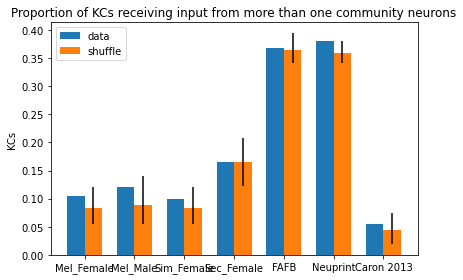

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
z = 1.96

datasets = [W_Mel_Female, W_Mel_Male, W_Sim_Female, W_Sec_Female, W_FAFB, W_Neuprint_thr, W_Caron2013]
labels = ['Mel_Female', 'Mel_Male', 'Sim_Female', 'Sec_Female', 'FAFB', 'Neuprint', 'Caron 2013']
props = []
props_rand = []
lowers = []
highers = []
num_shuffles = 100

for dataset in datasets:
    props.append(CommonConnection(community, dataset))
    props_rand_list = []
    for i in range(num_shuffles):
        dataset_rand = shufmat(dataset)
        dataset_rand = pd.DataFrame(dataset_rand)
        dataset_rand.columns = dataset.columns
        props_rand_list.append(CommonConnection(community, dataset_rand))
    props_rand.append(np.mean(props_rand_list))
    lower, higher = confidence_interval(props_rand_list)
    lowers.append(np.mean(props_rand_list) - lower)
    highers.append(higher - np.mean(props_rand_list))

errors = np.array([lowers, highers])
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, props, width, label='data')
rects2 = ax.bar(x + width/2, props_rand, width, yerr = errors, label='shuffle')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('KCs')
ax.set_title('Proportion of KCs receiving input from more than one community neurons')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

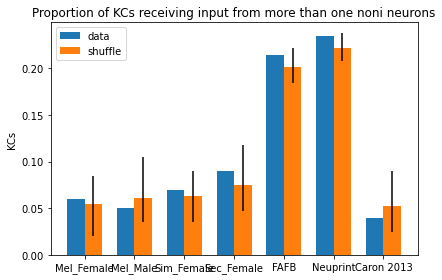

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
z = 1.96

datasets = [W_Mel_Female, W_Mel_Male, W_Sim_Female, W_Sec_Female, W_FAFB, W_Neuprint_thr, W_Caron2013]
labels = ['Mel_Female', 'Mel_Male', 'Sim_Female', 'Sec_Female', 'FAFB', 'Neuprint', 'Caron 2013']
props = []
props_rand = []
lowers = []
highers = []
num_shuffles = 100

for dataset in datasets:
    props.append(CommonConnection(noni, dataset))
    props_rand_list = []
    for i in range(num_shuffles):
        dataset_rand = shufmat(dataset)
        dataset_rand = pd.DataFrame(dataset_rand)
        dataset_rand.columns = dataset.columns
        props_rand_list.append(CommonConnection(noni, dataset_rand))
    props_rand.append(np.mean(props_rand_list))
    lower, higher = confidence_interval(props_rand_list)
    lowers.append(np.mean(props_rand_list) - lower)
    highers.append(higher - np.mean(props_rand_list))

errors = np.array([lowers, highers])
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, props, width, label='data')
rects2 = ax.bar(x + width/2, props_rand, width, yerr = errors, label='shuffle')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('KCs')
ax.set_title('Proportion of KCs receiving input from more than one noni neurons')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()